## 0.0 IMPORTS

In [1]:
# Imports
import numpy as np # manipulações de dados
import pandas as pd

import matplotlib.pyplot as plt # visualizações/ construção de gráficos
import seaborn as sns

import sklearn # machine learning
from sklearn.model_selection import train_test_split # divisão dos dados em treino e teste
from sklearn.preprocessing import StandardScaler     # padronização
from sklearn.linear_model import LinearRegression    # algoritmo de regressão linear
from sklearn.linear_model import Ridge               # algoritmo de ridge
from sklearn.linear_model import Lasso               # algoritmo lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score # funções para cálculo de métricas

sns.set_style('whitegrid') # definição do estilo de gráfico seaborn

%matplotlib inline 

import warnings # filtrando os warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### 0.1 Helper Functions

In [2]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.7


In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Camila D'Angelo" --iversions

Author: Camila D'Angelo

seaborn   : 0.11.2
matplotlib: 3.4.3
numpy     : 1.20.3
sklearn   : 1.1.2
pandas    : 1.4.2



## LOADING DATA

In [4]:
# Carrega o dataset
dados = pd.read_csv('dados/dataset.csv')

In [5]:
# Check Shape: tamanho dos dados
dados.shape

(500, 5)

In [6]:
# Check Info: tipo de variáveis
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tempo_cadastro_cliente           500 non-null    float64
 1   numero_medio_cliques_por_sessao  500 non-null    float64
 2   tempo_total_logado_app           500 non-null    float64
 3   tempo_total_logado_website       500 non-null    float64
 4   valor_total_gasto                500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [7]:
# Amostra
# target: valor_total_gasto
dados.sample(10)

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
291,3.634996,33.780157,11.917636,36.844734,518.786483
477,2.571778,32.675155,12.594194,37.683875,444.582165
162,3.292798,34.569381,12.854990,35.007482,576.311177
66,4.650491,32.749368,9.954976,37.388315,478.170334
455,3.969418,33.625307,12.988221,39.672591,581.798798
247,5.066697,34.967610,13.919494,37.952013,712.396327
360,3.515688,33.531860,13.665770,36.900221,564.790969
483,3.393975,33.421212,10.706642,35.766154,438.303708
248,3.107469,32.295248,11.031358,38.252978,413.295999
358,2.532044,33.566474,12.235659,37.277573,466.421199


## Análise Exploratória de Dados

In [8]:
# Colunas
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

In [9]:
# Correlação (tabela)
dados.corr()

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
tempo_cadastro_cliente,1.000000,0.060247,0.029143,-0.047582,0.809084
numero_medio_cliques_por_sessao,0.060247,1.000000,-0.027826,-0.034987,0.355088
tempo_total_logado_app,0.029143,-0.027826,1.000000,0.082388,0.499328
tempo_total_logado_website,-0.047582,-0.034987,0.082388,1.000000,-0.002641
valor_total_gasto,0.809084,0.355088,0.499328,-0.002641,1.000000


> **Análise**

Forte Correlação: **tempo_cadastro_cliente** e **valor_total_gasto** possui forte correlação positiva de 0.8


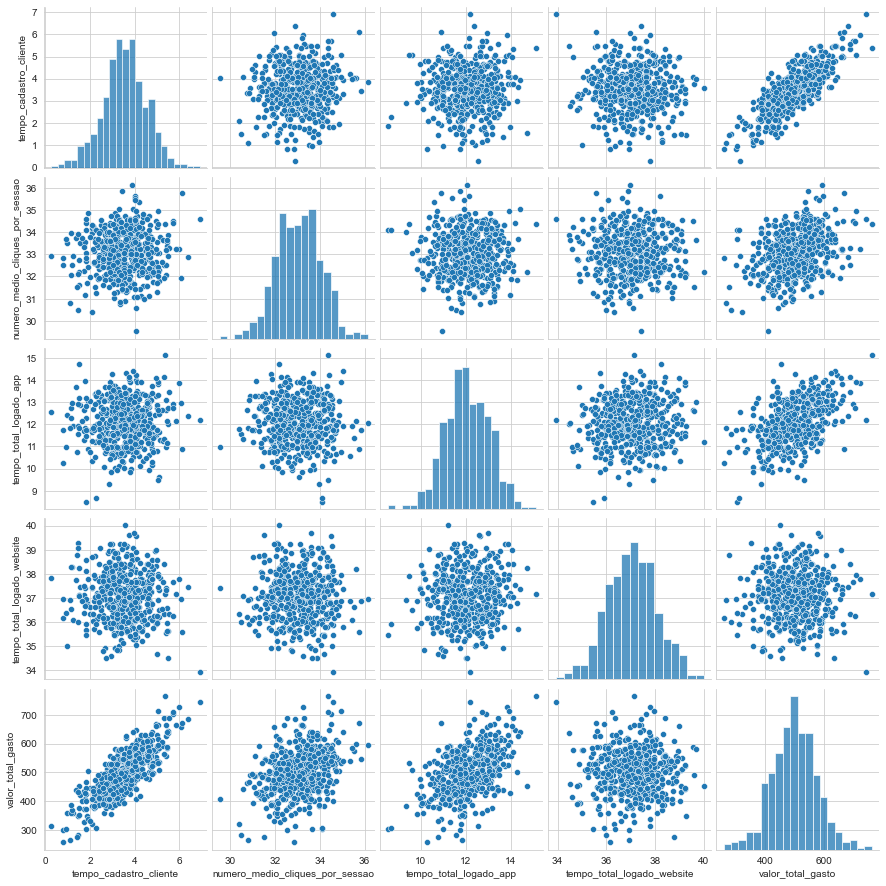

In [10]:
# Correlação (visual)
sns.pairplot(dados);

> **Análise**

As variavéis aparentam seguir uma distribuição normal

### Análise 1 - Relação Entre Tempo no Web Site e Valor Gasto (target)

<Figure size 1296x864 with 0 Axes>

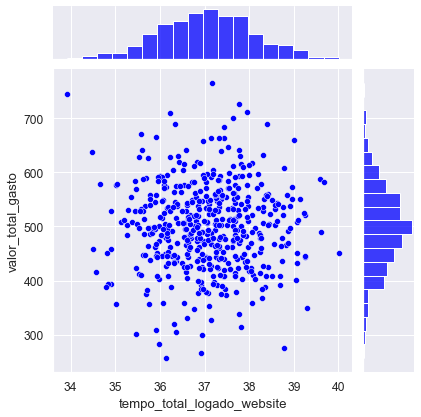

In [11]:
# Plot
plt.figure(figsize = (18, 12));
sns.set(font_scale = 1.1);
sns.jointplot(data = dados, # plot de junção
              x = 'tempo_total_logado_website', 
              y = 'valor_total_gasto',
              color = 'blue');

> **Aálise**

* Podemos obervar através do histograma, que os dados estão normalmente distribuídos (seguem uma distribuição normal). 

* Podemos observar através do gráfico de dispersão, que parece **não haver uma correlação** entre essas duas variáveis. 

Vamos confirmar calculando o coeficiente de correlação entre elas.

In [12]:
# Correlação
dados[['tempo_total_logado_website', 'valor_total_gasto']].corr()

,tempo_total_logado_website,valor_total_gasto
tempo_total_logado_website,1.000000,-0.002641
valor_total_gasto,-0.002641,1.000000


> Como imaginavamos, o valor do corr é baixo (muito próximo de zero), ou sea,não parece haver correlação entre o **tempo logado no website** e o **valor gasto** pelos clientes.

### Análise 2 - Relação Entre Tempo na App e Valor Gasto

In [13]:
# Colunas
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

<Figure size 1296x864 with 0 Axes>

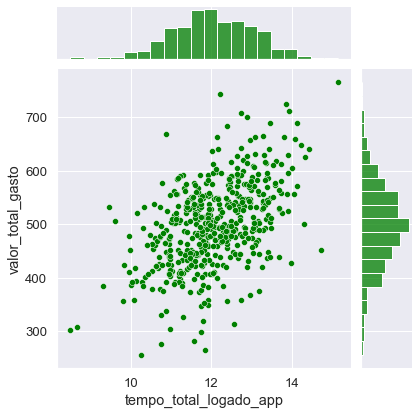

In [14]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.2)
sns.jointplot(data = dados, 
              x = 'tempo_total_logado_app', 
              y = 'valor_total_gasto', 
              color = 'green')

> **Análise**

* Através do histogramas, podemos observar que os dados estão normalmente distribuídos (seguem uma distribuição normal). 

* Através do gráfico de dispersão, observamos que parece haver **correlação positiva** entre as duas variáveis. 

Vamos confirmar calculando o coeficiente de correlação entre elas.

In [15]:
# Correlação
dados[['tempo_total_logado_app', 'valor_total_gasto']].corr()

,tempo_total_logado_app,valor_total_gasto
tempo_total_logado_app,1.000000,0.499328
valor_total_gasto,0.499328,1.000000


> Através dp calculo do corr, vemos que os dados têm uma **correlação positiva moderada**. 

Sendo assim, podemos deduzir que o valor total gasto mensalmente tende a aumentar se o cliente passar mais tempo logado na app.

### Análise 3 - Relação Entre Tempo na App e Tempo de Cadastro

In [16]:
# Colunas
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

<Figure size 1296x864 with 0 Axes>

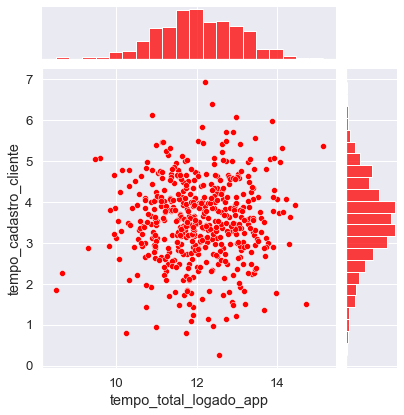

In [17]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.2)
sns.jointplot(data = dados, 
              x = 'tempo_total_logado_app', 
              y = 'tempo_cadastro_cliente', 
              color = 'red')

> **Análise**

* Observando os histogramas, podemos ver que os dados estão normalmente distribuídos (seguem uma distribuição normal). 

* A partir do gráfico de dispersão podemos ver que os dados são muito densos no meio do gráfico, **não havendo uma correlação clara**. 

Podemos deduzir que existem muitos clientes que são membros há 3-4 anos e gastam aproximadamente 11,5 a 12,5 minutos na app.

### Análise 4 - Relação Entre Tempo de Cadastro e Valor Gasto

In [18]:
# Colunas
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

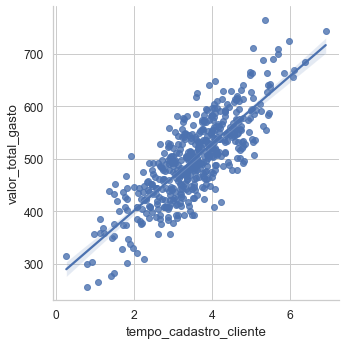

In [19]:
# Plot
sns.set(font_scale = 1.1)
sns.set_style('whitegrid')
sns.lmplot(y = "valor_total_gasto", x = "tempo_cadastro_cliente", data = dados)

In [20]:
# Correlação
dados[['tempo_cadastro_cliente', 'valor_total_gasto']].corr()

,tempo_cadastro_cliente,valor_total_gasto
tempo_cadastro_cliente,1.000000,0.809084
valor_total_gasto,0.809084,1.000000


> **Análise**

* A partir do lmplot e do coeficiente de correlação, podemos ver que o tempo de cadstro e o valor total gasto têm uma **forte correlação positiva**, ou seja, à medida que o cliente se torna mais antigo (mais tempo de cadastro), o valor total gasto por clientes também aumenta.

* Outra coisa a se notar é que a sombra ao redor da linha é muito fina, o que significa que os erros entre a estimativa (linha) e os pontos de dados são relativamente pequenos.

### Análise 5 - Relação Entre Tempo Logado na App e Tempo Logado no Web Site

<Figure size 1296x864 with 0 Axes>

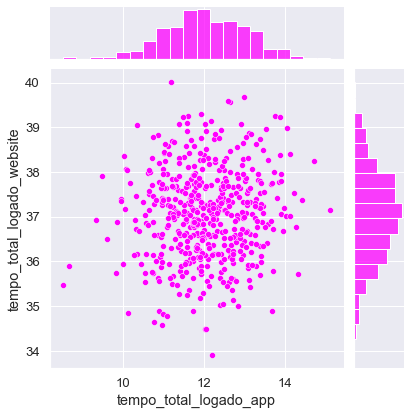

In [21]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.2)
sns.jointplot(data = dados, x = 'tempo_total_logado_app', y = 'tempo_total_logado_website', color = 'magenta' )

> **Análise**

* Não detectamos problemas críticos e podemos seguir adiante. Vamos manter a variável preditora com baixa correlação e validar essa relação com a variável alvo no modelo final.

## Pré-Processamento de Dados Para Construção de Modelos de Machine Learning

In [22]:
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

In [23]:
# Variáveis de entrada (variáveis preditoras)
X = dados[['tempo_cadastro_cliente', 
           'numero_medio_cliques_por_sessao',
           'tempo_total_logado_app', 
           'tempo_total_logado_website']]

In [24]:
# Variável de saída (variável alvo ou target)
y = dados['valor_total_gasto']

In [25]:
# Divisão em dados de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [26]:
len(X_treino)

350

In [27]:
len(X_teste)

150

### Padronização

In [28]:
scaler = StandardScaler()

In [29]:
scaler.fit(X_treino)

StandardScaler()

In [30]:
X_treino = scaler.transform(X_treino)

In [31]:
X_teste = scaler.transform(X_teste)

In [32]:
X_treino[:5]

array([[-0.21902935, -0.23735512,  0.33914084,  0.92765292],
       [ 1.8073082 ,  0.09393489,  1.05266311,  0.2388907 ],
       [-0.00962736, -0.47064535, -0.26005737,  0.81461639],
       [-0.06171807, -0.23157636, -0.19229742, -0.26198867],
       [-2.03669802, -1.54671013, -1.27813419,  1.65800995]])

In [33]:
X_teste[:5]

array([[-0.74134552,  0.35042401,  1.32428694,  0.85663193],
       [ 0.51634261,  0.33850011,  1.36472848,  0.1071885 ],
       [ 1.22462847, -0.84278168,  1.70184401,  0.88678948],
       [ 0.48199668, -0.30436824, -0.65228214, -1.76956776],
       [ 1.88519232, -0.14493923,  0.70658414, -1.44006612]])